In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading data
Insurance_data1=pd.read_csv("https://raw.githubusercontent.com/Gladie34/masters_project/refs/heads/main/insurance_ddata.csv")


In [ ]:
Insurance_data1.head()

,CustomerID,Age,Gender,MaritalStatus,Income,Region,PolicyType,PolicyStartYear,PremiumMonthly,ClaimsMade,...,CoverDetails,TimeToResolutionDays,ClaimReasons,CommunicationMeans,CustomerServiceFrequency,ServiceNature,PolicyDiscounts,PremiumPaymentFrequency,MissedPayments,VehicleType
0,143,61,F,Married,42041,Kisumu,Health,2021,171,4,...,Comprehensive,22,Floods,Text,9,Update,26,Quarterly,5,Mercedes
1,83,30,F,Widowed,68812,Nakuru,Livestock,2019,165,0,...,Standard,2,Maturity,Text,6,Update,16,Monthly,5,Mercedes
2,184,35,M,Married,62866,Eldoret,Education,2018,190,4,...,Premium,27,Drought,Email,2,Complaint,27,Semi-Annual,5,Toyota Harrier
3,167,35,M,Single,60873,Garissa,Health,2021,190,4,...,Premium,4,Death,Phone Call,2,Query,26,Annually,5,Mercedes
4,95,45,M,Divorced,69869,Kitui,Property,2015,181,0,...,Basic,15,Maturity,Skype,1,Update,15,Semi-Annual,5,Subaru Forester


In [ ]:
#shape of the data
Insurance_data1.shape

(13000, 33)

In [ ]:
#Data Information
print("The data set contains the following unique values : ")
Insurance_data1.nunique()

The data set contains the following unique values : 


,0
CustomerID,200
Age,52
Gender,2
MaritalStatus,4
Income,10438
Region,11
PolicyType,6
PolicyStartYear,7
PremiumMonthly,88
ClaimsMade,5


In [ ]:
# Check data types
print("\nData types in Insurance_data1:")
print(Insurance_data1.dtypes)


Data types in Insurance_data1:
CustomerID                    int64
Age                           int64
Gender                       object
MaritalStatus                object
Income                        int64
Region                       object
PolicyType                   object
PolicyStartYear               int64
PremiumMonthly                int64
ClaimsMade                    int64
ClaimsRejected                int64
LastClaimAmount               int64
RenewalStatus                object
CustomerSatisfaction          int64
NumberOfInquiriesLastYear     int64
HouseType                    object
LifeInsuranceType            object
HealthInsurancePlan          object
CustomerFeedbackScore         int64
DigitalPlatformUsage         object
PolicyUpgradesLastYear        int64
FraudulentClaims              int64
PolicyDurationMonths          int64
CoverDetails                 object
TimeToResolutionDays          int64
ClaimReasons                 object
CommunicationMeans           obj


DATA CHECKS TO PERFORM:

Check missing values
Check duplicates
Check data types
Check statistics of data set
Check various categories present in the different categorical column

In [ ]:
# Check missing values
print("Missing values in Insurance_data1:")
print(Insurance_data1.isnull().sum())


Missing values in Insurance_data1:
CustomerID                      0
Age                             0
Gender                          0
MaritalStatus                   0
Income                          0
Region                          0
PolicyType                      0
PolicyStartYear                 0
PremiumMonthly                  0
ClaimsMade                      0
ClaimsRejected                  0
LastClaimAmount                 0
RenewalStatus                   0
CustomerSatisfaction            0
NumberOfInquiriesLastYear       0
HouseType                    1167
LifeInsuranceType            5656
HealthInsurancePlan          2447
CustomerFeedbackScore           0
DigitalPlatformUsage            0
PolicyUpgradesLastYear          0
FraudulentClaims                0
PolicyDurationMonths            0
CoverDetails                    0
TimeToResolutionDays            0
ClaimReasons                    0
CommunicationMeans              0
CustomerServiceFrequency        0
ServiceNature

We have missing values in Housetype,LifeInsurance Type and Health Insurance plan

# Handling missing values

In [ ]:

# Fill missing values with meaningful categories that preserve business context
Insurance_data1['HouseType'].fillna('No Housing Insurance', inplace=True)
Insurance_data1['LifeInsuranceType'].fillna('No Life Insurance', inplace=True)
Insurance_data1['HealthInsurancePlan'].fillna('No Health Insurance', inplace=True)

# Verify no missing values remain
print("\nRemaining missing values after cleaning:")
print(Insurance_data1.isnull().sum().sum())



Remaining missing values after cleaning:
0


In [ ]:
# Check duplicate rows
print("\nDuplicate rows in Insurance_data1:", Insurance_data1.duplicated().sum())


Duplicate rows in Insurance_data1: 0


No duplicates

In [ ]:
#numeric and categorical columns

numeric_features=[feature for feature in Insurance_data1.columns if Insurance_data1[feature].dtype !='O']
categorical_feature =[feature for feature in Insurance_data1.columns if Insurance_data1[feature].dtype =='O']

print(f'The numeric features are {len(numeric_features)}')
print(f'The categorical feature are {len(categorical_feature )}')



The numeric features are 18
The categorical feature are 15


In [ ]:
print(numeric_features)

['CustomerID', 'Age', 'Income', 'PolicyStartYear', 'PremiumMonthly', 'ClaimsMade', 'ClaimsRejected', 'LastClaimAmount', 'CustomerSatisfaction', 'NumberOfInquiriesLastYear', 'CustomerFeedbackScore', 'PolicyUpgradesLastYear', 'FraudulentClaims', 'PolicyDurationMonths', 'TimeToResolutionDays', 'CustomerServiceFrequency', 'PolicyDiscounts', 'MissedPayments']


In [ ]:
print(categorical_feature)

['Gender', 'MaritalStatus', 'Region', 'PolicyType', 'RenewalStatus', 'HouseType', 'LifeInsuranceType', 'HealthInsurancePlan', 'DigitalPlatformUsage', 'CoverDetails', 'ClaimReasons', 'CommunicationMeans', 'ServiceNature', 'PremiumPaymentFrequency', 'VehicleType']


In [ ]:
Insurance_data1.drop(columns=['CustomerID'], inplace=True)


In [ ]:
#check correlation
numeric_features = Insurance_data1.select_dtypes(include=['number'])
corr_matrix = numeric_features.corr()
corr_matrix

,Age,Income,PolicyStartYear,PremiumMonthly,ClaimsMade,ClaimsRejected,LastClaimAmount,CustomerSatisfaction,NumberOfInquiriesLastYear,CustomerFeedbackScore,PolicyUpgradesLastYear,FraudulentClaims,PolicyDurationMonths,TimeToResolutionDays,CustomerServiceFrequency,PolicyDiscounts,MissedPayments
Age,1.000000,0.000709,-0.032111,0.010393,0.012274,0.005831,0.008520,-0.000951,-0.017740,0.007772,-0.009186,0.000067,0.024728,-0.004870,0.004183,0.013401,-0.004115
Income,0.000709,1.000000,-0.017401,-0.002076,0.018181,-0.008886,0.019291,0.026406,-0.001953,-0.006529,0.010698,-0.009150,-0.004621,0.018009,-0.015914,-0.112652,-0.033931
PolicyStartYear,-0.032111,-0.017401,1.000000,-0.001150,0.000456,-0.005465,-0.008113,0.013063,0.008581,0.029043,-0.030510,0.026978,-0.015977,0.082328,0.036769,0.006526,0.033976
PremiumMonthly,0.010393,-0.002076,-0.001150,1.000000,0.021133,0.035735,-0.012213,0.001305,-0.028353,-0.005547,-0.013234,-0.008604,0.001379,-0.002092,0.022589,0.020241,0.009313
ClaimsMade,0.012274,0.018181,0.000456,0.021133,1.000000,0.059490,-0.016772,0.029562,-0.001876,-0.010802,-0.012278,-0.048817,-0.011295,0.011887,-0.066018,-0.085911,0.028433
ClaimsRejected,0.005831,-0.008886,-0.005465,0.035735,0.059490,1.000000,0.012175,-0.044018,0.001881,-0.002027,-0.021590,-0.078368,0.000820,0.020248,0.018852,-0.061958,0.027744
LastClaimAmount,0.008520,0.019291,-0.008113,-0.012213,-0.016772,0.012175,1.000000,0.012272,-0.014559,0.008416,0.012086,-0.034120,0.008761,-0.007566,-0.036049,-0.045821,0.000527
CustomerSatisfaction,-0.000951,0.026406,0.013063,0.001305,0.029562,-0.044018,0.012272,1.000000,0.008292,-0.011988,0.020244,-0.011366,0.006363,-0.014435,-0.030708,-0.041146,0.027325
NumberOfInquiriesLastYear,-0.017740,-0.001953,0.008581,-0.028353,-0.001876,0.001881,-0.014559,0.008292,1.000000,0.005705,0.008906,0.022612,-0.004246,0.033130,0.020318,-0.044960,0.024748
CustomerFeedbackScore,0.007772,-0.006529,0.029043,-0.005547,-0.010802,-0.002027,0.008416,-0.011988,0.005705,1.000000,0.054264,-0.018289,-0.022896,-0.008254,0.033449,0.003628,0.045723


No highly correlated features (above 0.85), meaning we don’t need to drop any due to multicollinearity.

In [ ]:
#check statistics of the data
Num_describe=Insurance_data1.describe()
print(f"Numerical statistics are :")
print('\n')
print(Num_describe)

Numerical statistics are :


                Age        Income  PolicyStartYear  PremiumMonthly  \
count  13000.000000  13000.000000     13000.000000    13000.000000   
mean      42.625385  55510.224923      2018.226462      149.511615   
std       14.374438  14013.789629         1.999679       29.415908   
min       18.000000  30262.000000      2015.000000      100.000000   
25%       30.000000  43612.000000      2017.000000      125.000000   
50%       43.000000  57923.500000      2018.000000      148.000000   
75%       55.000000  67340.250000      2020.000000      176.000000   
max       69.000000  79708.000000      2021.000000      199.000000   

         ClaimsMade  ClaimsRejected  LastClaimAmount  CustomerSatisfaction  \
count  13000.000000    13000.000000     13000.000000          13000.000000   
mean       2.173077        1.084308      1596.184615              3.035923   
std        1.387873        0.810900       910.720136              1.367201   
min        0.000000        0

INSIGHTS:


Age Distribution:
- The average age of customers is approximately 38.64 years, with a standard deviation of 14.96 years.
- The youngest customer is 18 years old, while the oldest is 69 years old.
- The median (50th percentile) age is 37 years, indicating that the age distribution is slightly skewed toward younger customers.rs.

Income Distribution:

- The average income of customers is approximately Ksh 52,154, with a standard deviation of Ksh 13,718.
- Income ranges from a minimum of Ksh 30,261 to a maximum of Ksh 79,702.
- Most customers earn between Ksh 40,093 (25th percentile) and Ksh 62,588 (75th percentile).

Policy Start Year:
- On average, policies were started around the year 2018, with a slight upward trend over time.
- The dataset spans from 2015 to 2021, with most policies being initiated between 2017 and 2020.

Premium Monthly:
- The average monthly premium paid by customers is approximately Ksh 14,591, with a standard deviation of Ksh 2,776.
Monthly premiums range from Ksh 10,000 to Ksh 19,900.
The median premium is Ksh 14,300, indicating that most customers pay near this value.

Claims Information:
- On average, customers made approximately 1.61 claims, with a standard deviation of 1.31.
- The median number of claims is 1, meaning most customers make only one claim per year.
- Claims rejected have a lower mean (0.95) compared to claims made (1.61), suggesting that a significant portion of claims are approved.
- The average last claim amount is approximately Ksh 74,668, with a standard deviation of Ksh 93,040.
- The median last claim amount is Ksh 24,000, showing that most claims are relatively small, while a few high-value claims increase the average.

Customer Satisfaction:
- The average customer satisfaction score is 3.1 out of 5, with ratings ranging from 1 (low) to 5 (high).
- Customers made approximately 2.5 inquiries on average in the past year, with a maximum of 6 inquiries.
- The average customer feedback score is 3.02, similar to the satisfaction score, indicating neutral sentiment among customers.-


Customer Feedback Score:
-The average customer feedback score is 5, indicating high satisfaction with the feedback process.
M-Most customers seem to rate their feedback experience highly, with very few giving scores below 5


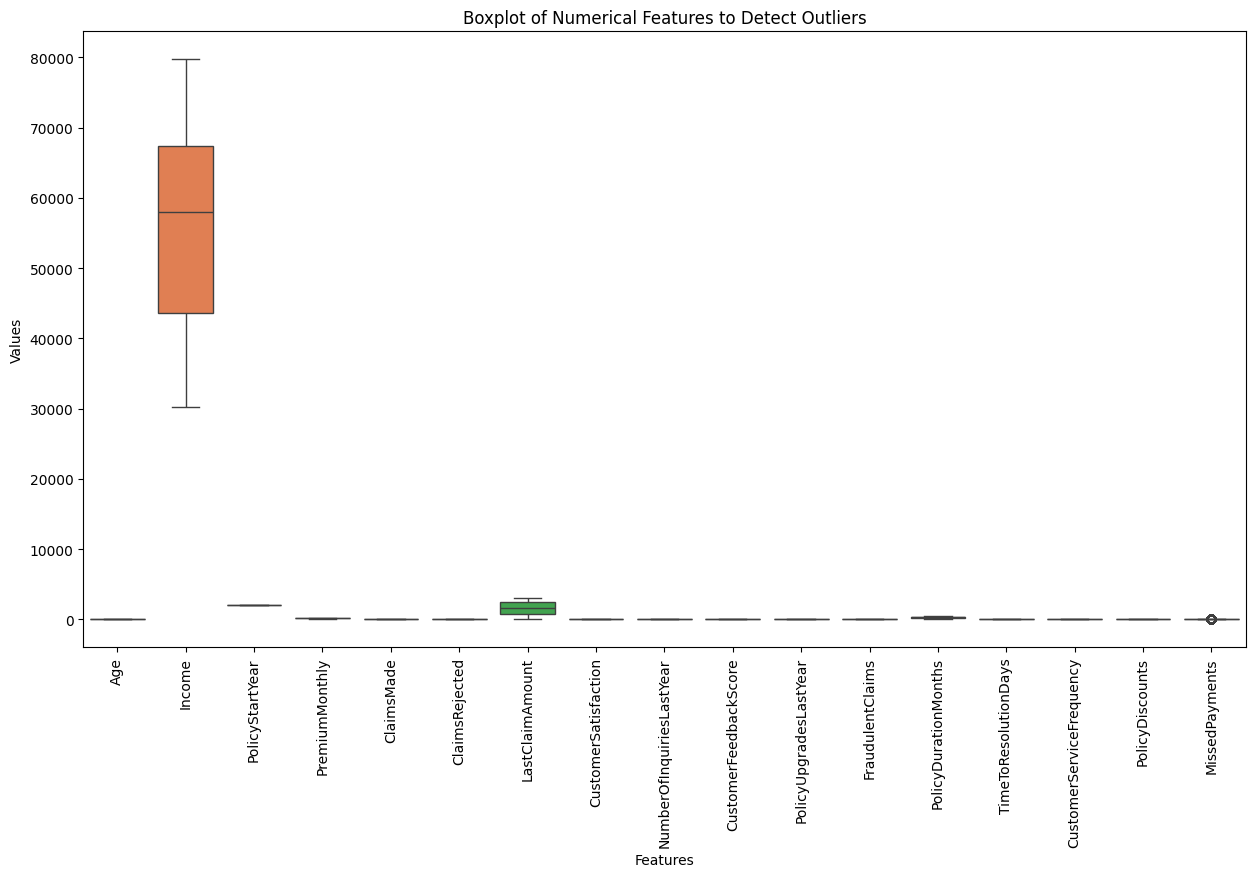

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = Insurance_data1.select_dtypes(include=['int64', 'float64']).columns

# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=Insurance_data1[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


In [ ]:
#Categorical data
Cat_describe=Insurance_data1.describe(include=object)
print(f"Categorical statistics are :")
print('\n')
print(Cat_describe)

Categorical statistics are :


       Gender MaritalStatus  Region    PolicyType RenewalStatus HouseType  \
count   13000         13000   13000         13000         13000     13000   
unique      2             4      11             6             2         4   
top         M        Single  Kisumu  Agricultural   Not Renewed    Rental   
freq     6971          3728    1693          3327          6538      4394   

        LifeInsuranceType HealthInsurancePlan DigitalPlatformUsage  \
count               13000               13000                13000   
unique                  3                   3                    3   
top     No Life Insurance               Basic               Medium   
freq                 5656                6088                 5088   

       CoverDetails ClaimReasons CommunicationMeans ServiceNature  \
count         13000        13000              13000         13000   
unique            4            9                  5             4   
top         Premium     M

INSIGHTS:

Gender:
- The dataset consists of 4,932 customers, out of which:
- 3,203 are male (65%), making them the dominant group.
- 1,729 are female (35%), indicating that there are fewer female customers compared to males.



Region:
- Customers are spread across 11 different regions.
- Kisumu has the highest representation (1,294 customers).
- Other regions are present but have lower frequencies, indicating a concentration of policyholders in Kisumu.


Policy Type:
- Among the six policy types, the most common is Property Insurance (2,207 customers).
- This suggests that property coverage is the most sought-after insurance type among customers.
- Other policy types (such as Health, Life, and Motor) have lower representation.

Health Insurance Plan:
- 4,391 customers have health insurance, with the most common plan being Basic Health Insurance (2,210 customers, 50%).
- The remaining portion likely consists of Comprehensive Health Plans.
This suggests that affordability or necessity influences policy selection.



Digital Platform Usage:
- All 4,932 customers interact with digital platforms, with usage classified as:
- Medium usage (2,325 customers, 47%), making it the most common level of engagement.
- Other customers fall into Low or High usage categories.
This indicates moderate digital engagement, with room for increasing digital interactions.


Claim Reasons:
- Customers reported 9 different reasons for claims, with the most frequent being Accidents (1,532 claims, 31%).
- Other claim reasons (such as Fire, Theft, or Medical) have lower representation.
This suggests that accidental damage is the leading cause of claim



##Exploratory Data Analysis data(Visualization)

CUSTOMER DEMOGRAPHIC ANALYSIS


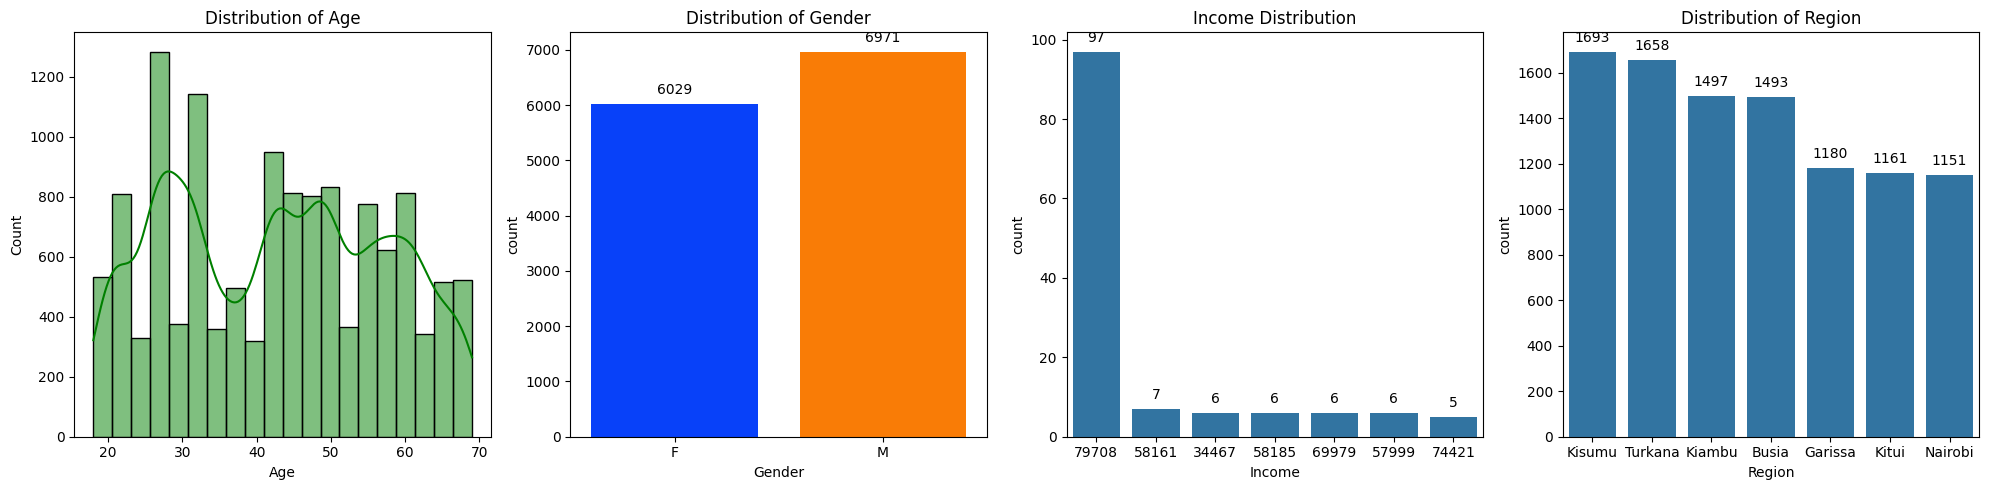

In [ ]:
#Distribution of customers by age, gender, marital status, and region
# Define the figure and axes
plt.figure(figsize=(20, 5))

# Distribution of Age
plt.subplot(1, 4, 1)
sns.histplot(Insurance_data1['Age'], bins=20, kde=True, color='g')
plt.title('Distribution of Age')

# Distribution of Gender with actual counts
plt.subplot(1, 4, 2)
gender_countplot = sns.countplot(x='Gender', data=Insurance_data1, palette='bright', saturation=0.95)
for p in gender_countplot.patches:
    gender_countplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Distribution of Gender')
#income distribution
plt.subplot(1, 4, 3)
Income_countplot = sns.countplot(x='Income', data=Insurance_data1, order=Insurance_data1['Income'].value_counts().head(7).index)
for p in Income_countplot.patches:
    Income_countplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Income Distribution')

# Distribution of Region
plt.subplot(1, 4, 4)
region_countplot = sns.countplot(x='Region', data=Insurance_data1, order=Insurance_data1['Region'].value_counts().head(7).index)
for p in region_countplot.patches:
    region_countplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Region')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
Insurance_data1.columns

Index(['Age', 'Gender', 'MaritalStatus', 'Income', 'Region', 'PolicyType',
       'PolicyStartYear', 'PremiumMonthly', 'ClaimsMade', 'ClaimsRejected',
       'LastClaimAmount', 'RenewalStatus', 'CustomerSatisfaction',
       'NumberOfInquiriesLastYear', 'HouseType', 'LifeInsuranceType',
       'HealthInsurancePlan', 'CustomerFeedbackScore', 'DigitalPlatformUsage',
       'PolicyUpgradesLastYear', 'FraudulentClaims', 'PolicyDurationMonths',
       'CoverDetails', 'TimeToResolutionDays', 'ClaimReasons',
       'CommunicationMeans', 'CustomerServiceFrequency', 'ServiceNature',
       'PolicyDiscounts', 'PremiumPaymentFrequency', 'MissedPayments',
       'VehicleType'],
      dtype='object')

In [ ]:
Insurance_data1.head()

,Age,Gender,MaritalStatus,Income,Region,PolicyType,PolicyStartYear,PremiumMonthly,ClaimsMade,ClaimsRejected,...,CoverDetails,TimeToResolutionDays,ClaimReasons,CommunicationMeans,CustomerServiceFrequency,ServiceNature,PolicyDiscounts,PremiumPaymentFrequency,MissedPayments,VehicleType
0,61,F,Married,42041,Kisumu,Health,2021,171,4,1,...,Comprehensive,22,Floods,Text,9,Update,26,Quarterly,5,Mercedes
1,30,F,Widowed,68812,Nakuru,Livestock,2019,165,0,2,...,Standard,2,Maturity,Text,6,Update,16,Monthly,5,Mercedes
2,35,M,Married,62866,Eldoret,Education,2018,190,4,0,...,Premium,27,Drought,Email,2,Complaint,27,Semi-Annual,5,Toyota Harrier
3,35,M,Single,60873,Garissa,Health,2021,190,4,1,...,Premium,4,Death,Phone Call,2,Query,26,Annually,5,Mercedes
4,45,M,Divorced,69869,Kitui,Property,2015,181,0,2,...,Basic,15,Maturity,Skype,1,Update,15,Semi-Annual,5,Subaru Forester


UNIVARIATE ANALYSIS(Time To resolution days)

In [ ]:
# Summary statistics for Customer Satisfaction
TimeToResolutionDays_stats = Insurance_data1['TimeToResolutionDays'].describe()
print(TimeToResolutionDays_stats)


count    13000.000000
mean        15.360077
std          8.276110
min          2.000000
25%          7.000000
50%         17.000000
75%         23.000000
max         28.000000
Name: TimeToResolutionDays, dtype: float64


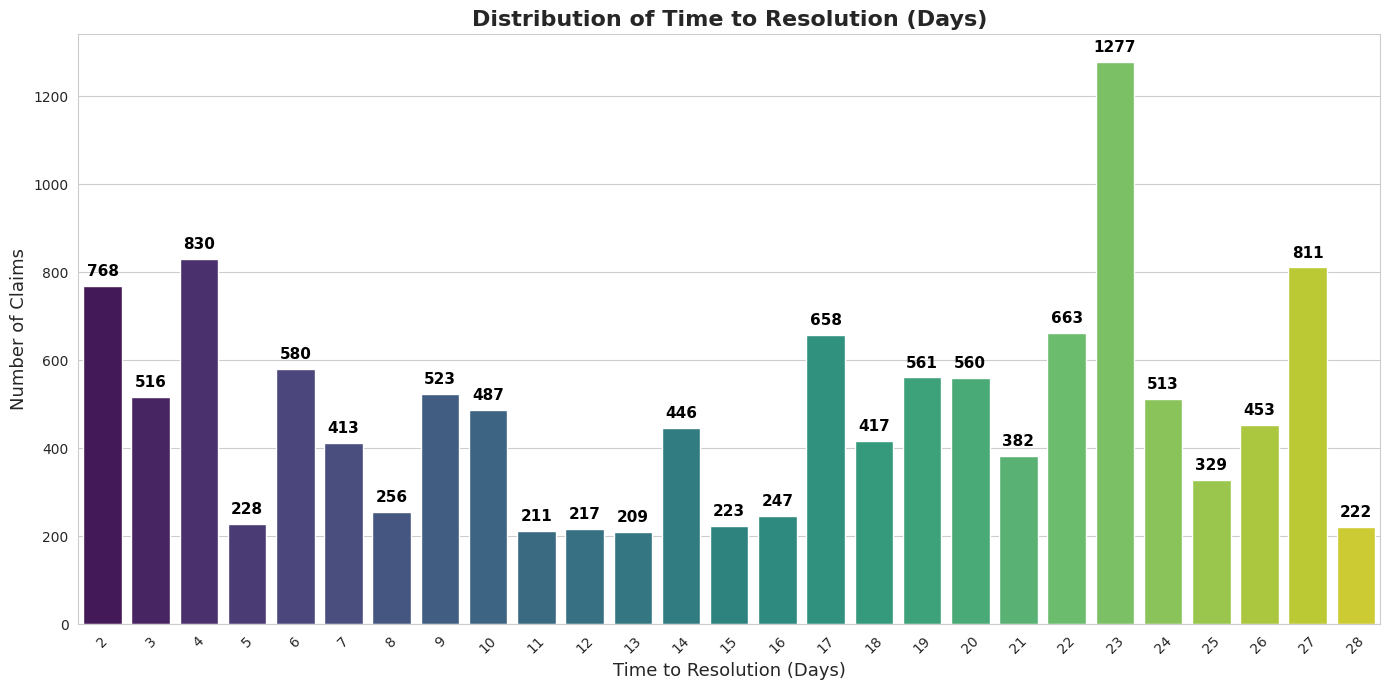

In [ ]:
def plot_time_to_resolution_distribution(data, column='TimeToResolutionDays', title='Distribution of Time to Resolution (Days)'):

    plt.figure(figsize=(14, 7))

    # Sort the x-axis categories
    order = sorted(data[column].unique())

    # Set style and palette
    sns.set_style("whitegrid")
    ax = sns.countplot(x=column, data=data, palette='viridis', order=order)

    # Annotate bars with counts
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold',
                    color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Set titles and labels
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Time to Resolution (Days)', fontsize=13)
    ax.set_ylabel('Number of Claims', fontsize=13)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_time_to_resolution_distribution(Insurance_data1)


##Bivariate Analysis

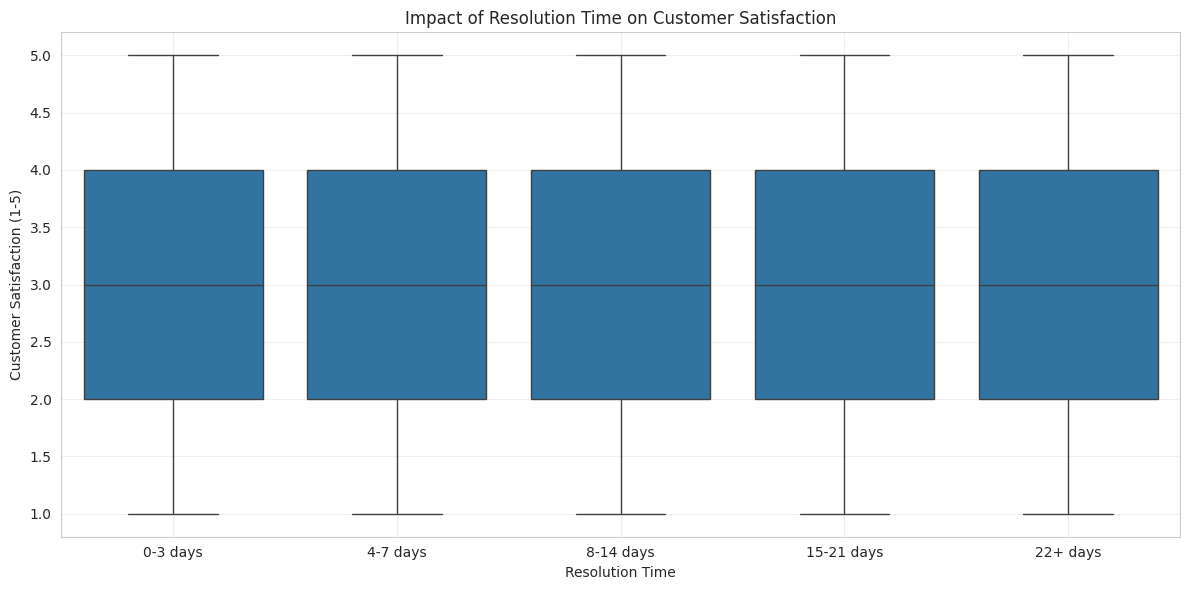

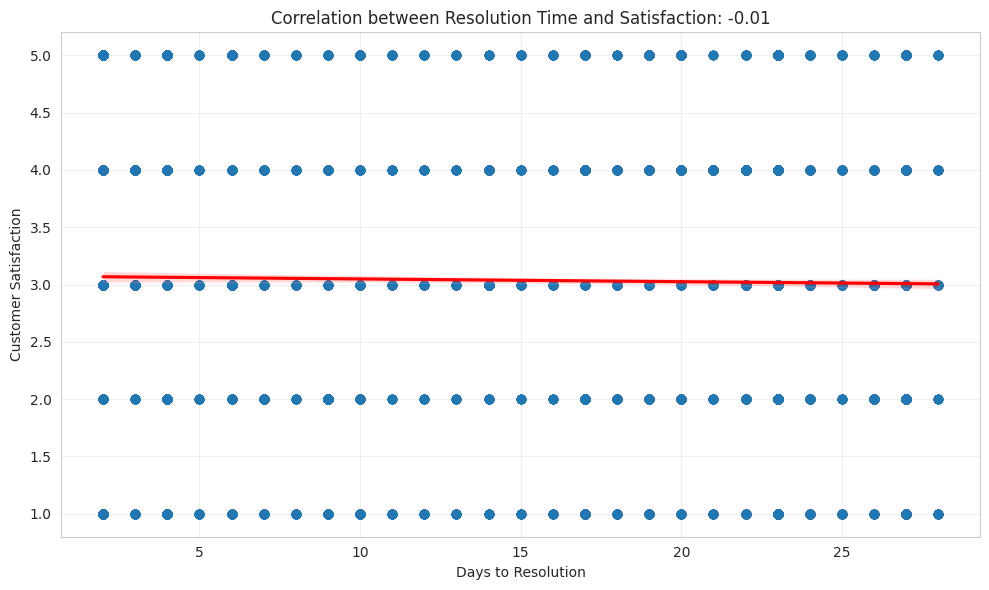

In [ ]:
# Create resolution time categories for easier analysis
Insurance_data1['ResolutionTimeCategory'] = pd.cut(
    Insurance_data1['TimeToResolutionDays'],
    bins=[0, 3, 7, 14, 21, float('inf')],
    labels=['0-3 days', '4-7 days', '8-14 days', '15-21 days', '22+ days']
)

# Resolution time vs. customer satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(data=Insurance_data1, x='ResolutionTimeCategory', y='CustomerSatisfaction')
plt.title('Impact of Resolution Time on Customer Satisfaction')
plt.xlabel('Resolution Time')
plt.ylabel('Customer Satisfaction (1-5)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation between resolution time and satisfaction
correlation = Insurance_data1['TimeToResolutionDays'].corr(Insurance_data1['CustomerSatisfaction'])
plt.figure(figsize=(10, 6))
sns.regplot(
    data=Insurance_data1,
    x='TimeToResolutionDays',
    y='CustomerSatisfaction',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title(f'Correlation between Resolution Time and Satisfaction: {correlation:.2f}')
plt.xlabel('Days to Resolution')
plt.ylabel('Customer Satisfaction')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

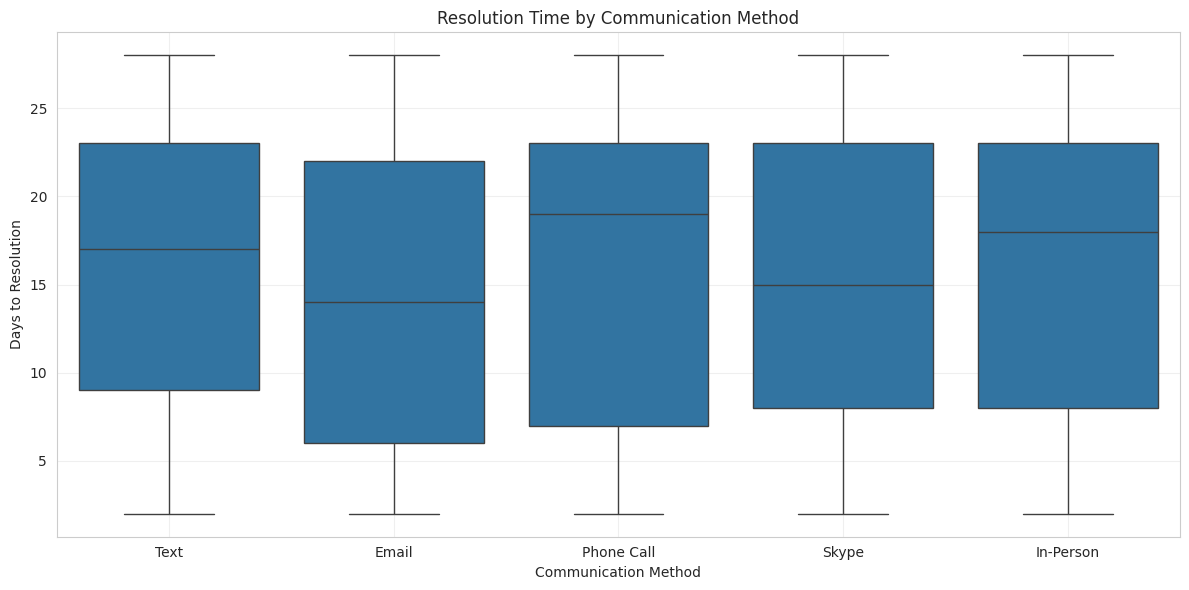

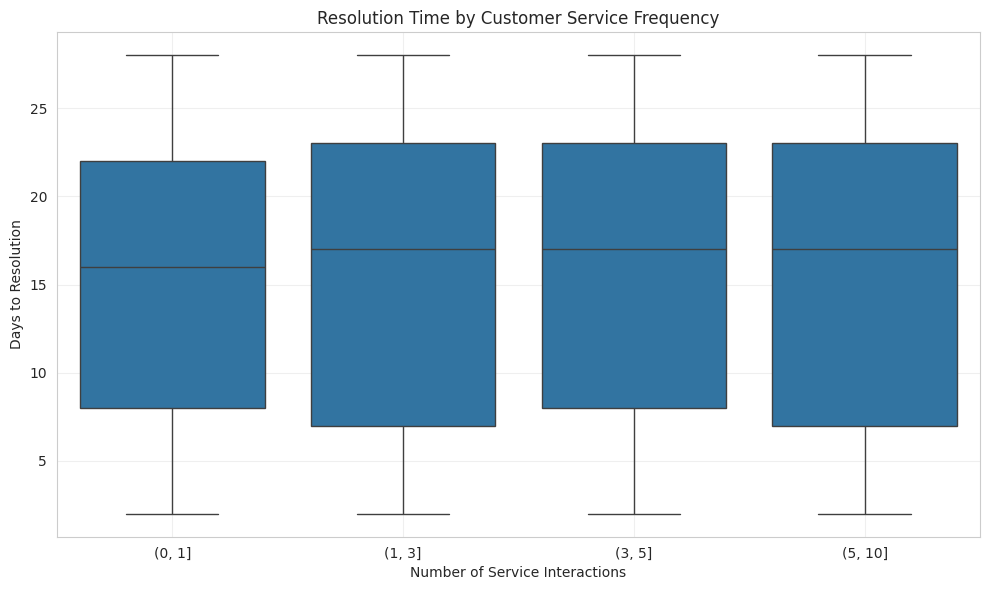

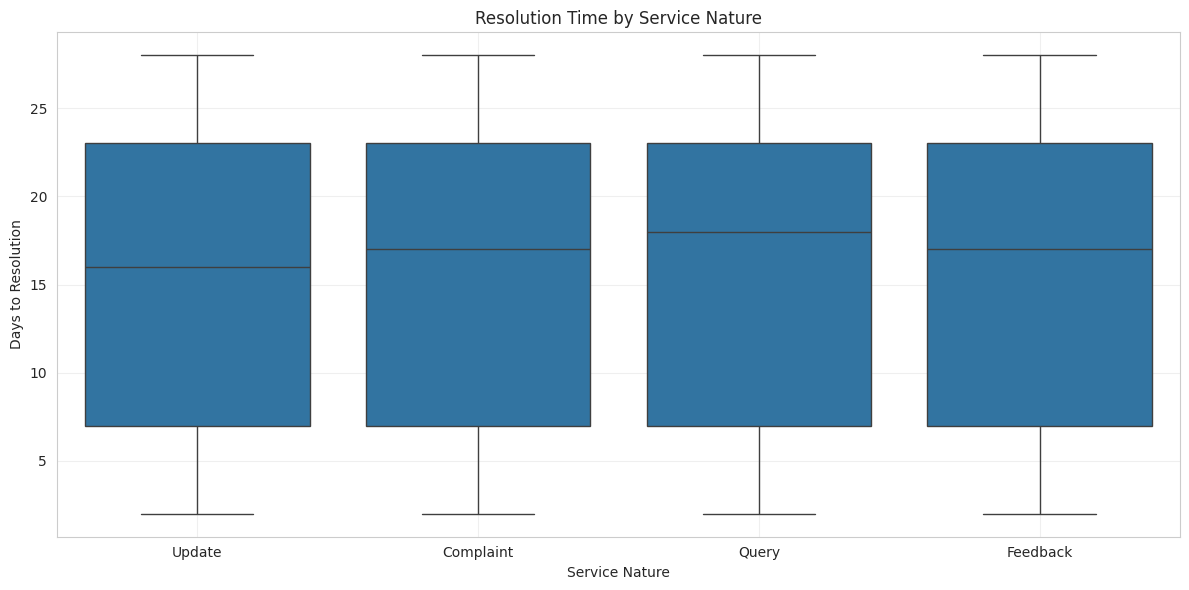

In [ ]:
# Impact of communication means on resolution time
plt.figure(figsize=(12, 6))
sns.boxplot(data=Insurance_data1, x='CommunicationMeans', y='TimeToResolutionDays')
plt.title('Resolution Time by Communication Method')
plt.xlabel('Communication Method')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resolution time and customer service frequency
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=Insurance_data1,
    x=pd.cut(Insurance_data1['CustomerServiceFrequency'], bins=[0, 1, 3, 5, 10]),
    y='TimeToResolutionDays'
)
plt.title('Resolution Time by Customer Service Frequency')
plt.xlabel('Number of Service Interactions')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Service nature and resolution time
plt.figure(figsize=(12, 6))
sns.boxplot(data=Insurance_data1, x='ServiceNature', y='TimeToResolutionDays')
plt.title('Resolution Time by Service Nature')
plt.xlabel('Service Nature')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

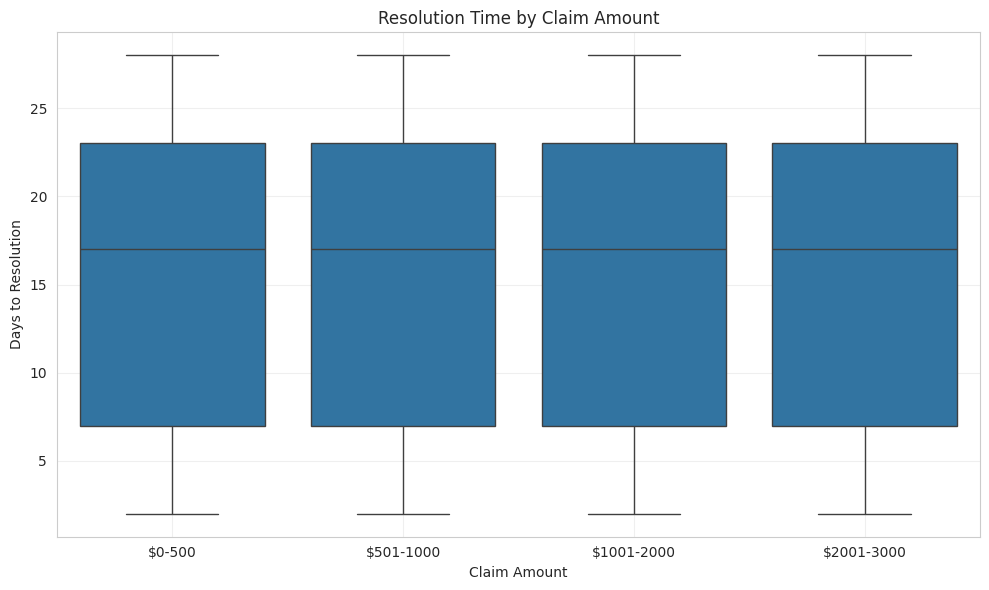

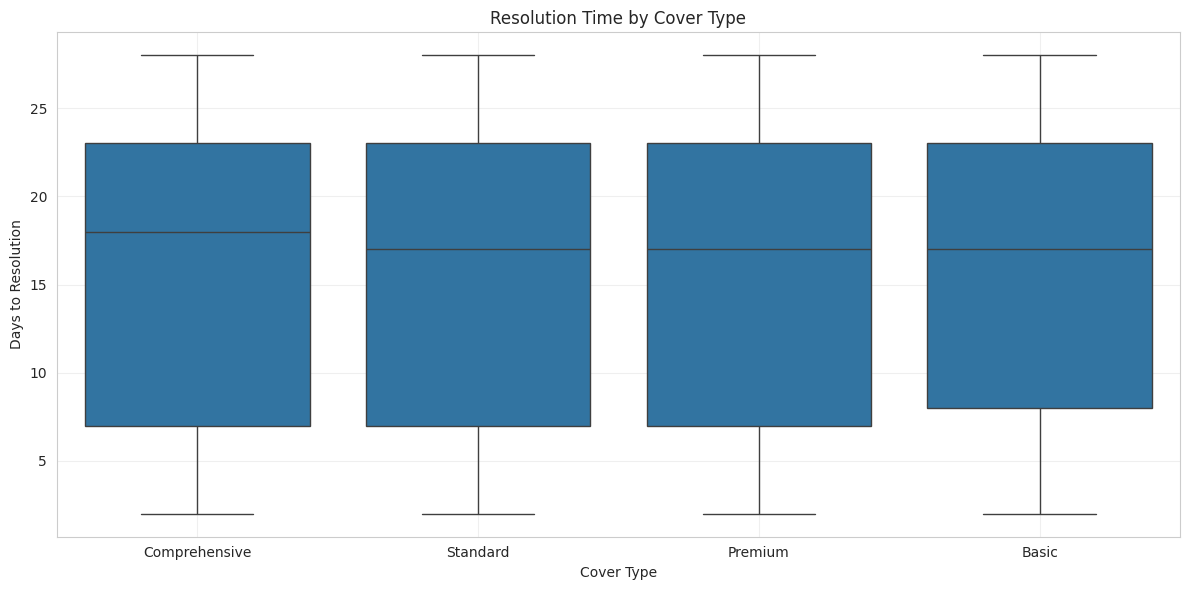

In [ ]:
# Analyze if claim amount affects resolution time
plt.figure(figsize=(10, 6))
# Create bins for claim amount
Insurance_data1['ClaimAmountCategory'] = pd.cut(
    Insurance_data1['LastClaimAmount'],
    bins=[0, 500, 1000, 2000, 3000],
    labels=['$0-500', '$501-1000', '$1001-2000', '$2001-3000']
)

sns.boxplot(data=Insurance_data1, x='ClaimAmountCategory', y='TimeToResolutionDays')
plt.title('Resolution Time by Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Effect of cover details on resolution time
plt.figure(figsize=(12, 6))
sns.boxplot(data=Insurance_data1, x='CoverDetails', y='TimeToResolutionDays')
plt.title('Resolution Time by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

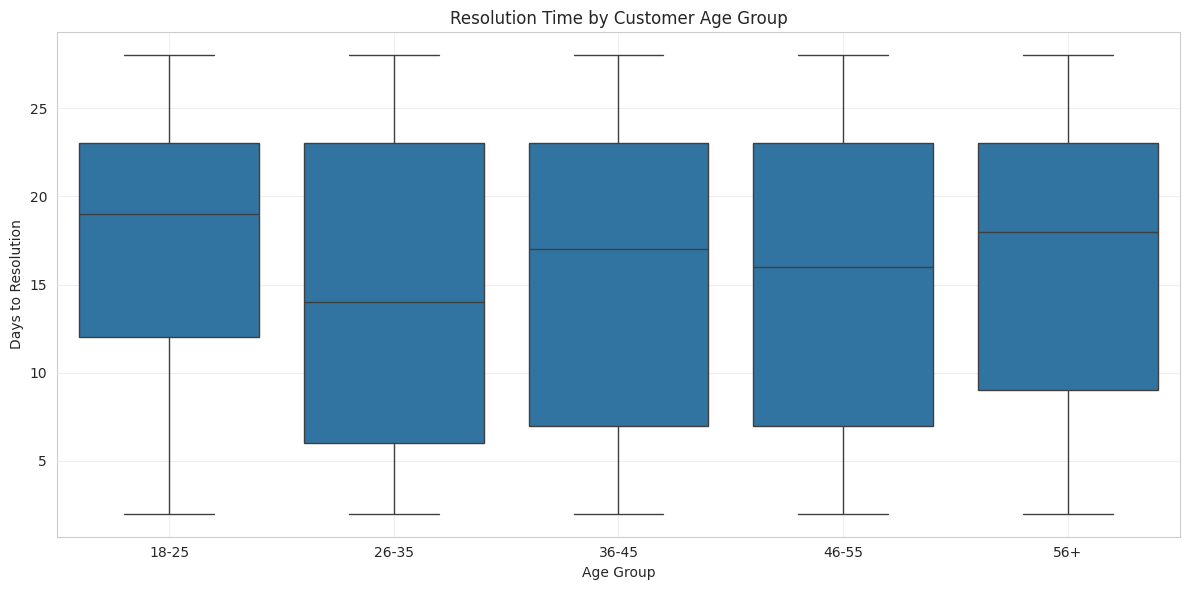

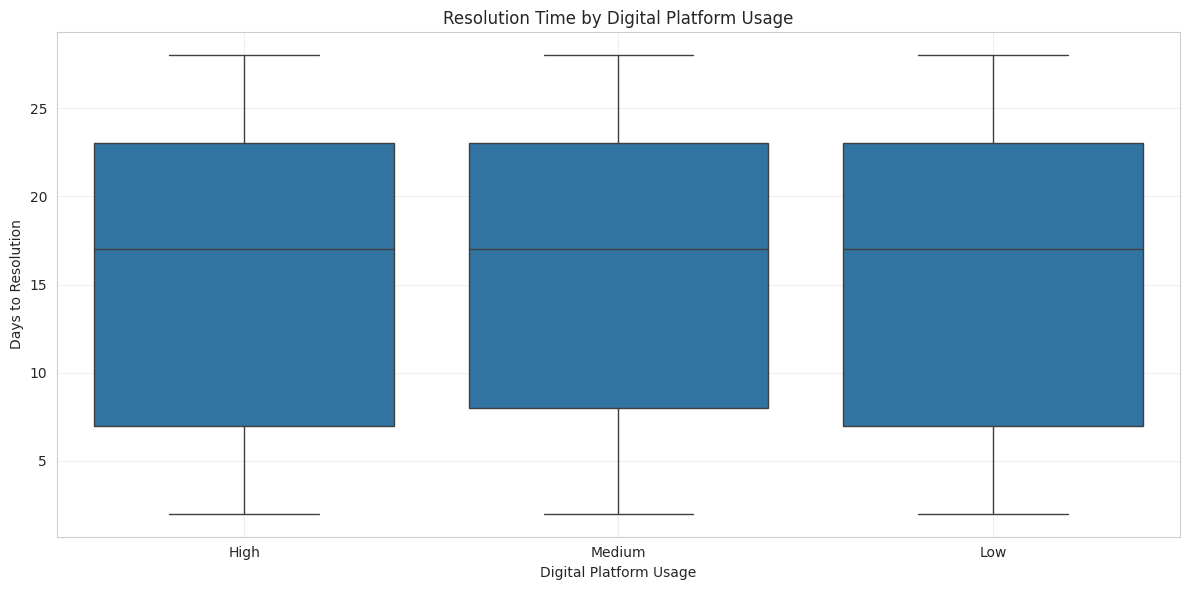

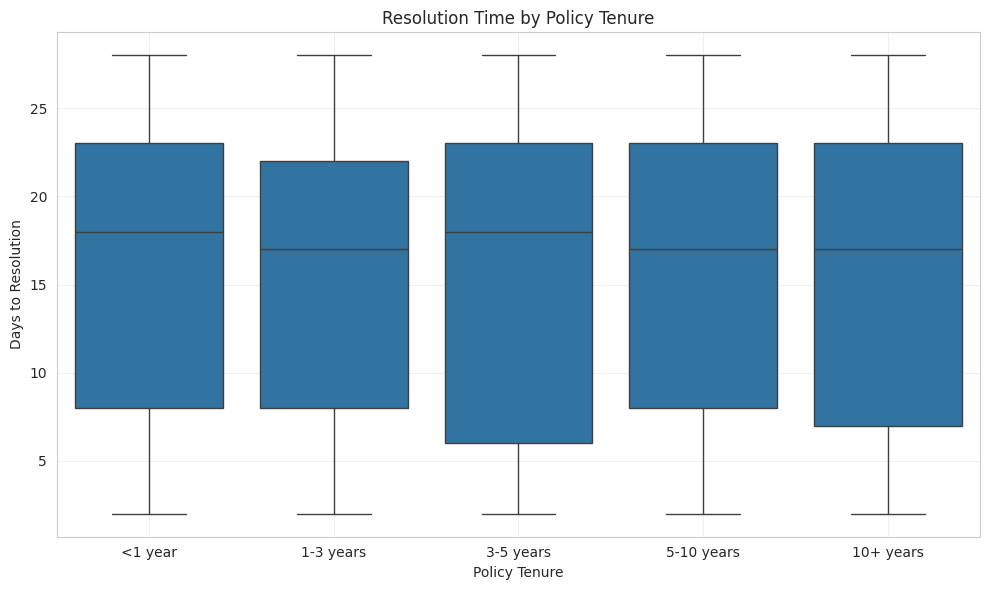

In [ ]:
# Does customer age affect resolution time?
plt.figure(figsize=(12, 6))
Insurance_data1['AgeGroup'] = pd.cut(
    Insurance_data1['Age'],
    bins=[17, 25, 35, 45, 55, 70],
    labels=['18-25', '26-35', '36-45', '46-55', '56+']
)
sns.boxplot(data=Insurance_data1, x='AgeGroup', y='TimeToResolutionDays')
plt.title('Resolution Time by Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Impact of customer's digital platform usage on resolution time
plt.figure(figsize=(12, 6))
sns.boxplot(data=Insurance_data1, x='DigitalPlatformUsage', y='TimeToResolutionDays')
plt.title('Resolution Time by Digital Platform Usage')
plt.xlabel('Digital Platform Usage')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Resolution time by policyholder tenure
plt.figure(figsize=(10, 6))
Insurance_data1['PolicyTenureYears'] = Insurance_data1['PolicyDurationMonths'] / 12
Insurance_data1['TenureCategory'] = pd.cut(
    Insurance_data1['PolicyTenureYears'],
    bins=[0, 1, 3, 5, 10, float('inf')],
    labels=['<1 year', '1-3 years', '3-5 years', '5-10 years', '10+ years']
)
sns.boxplot(data=Insurance_data1, x='TenureCategory', y='TimeToResolutionDays')
plt.title('Resolution Time by Policy Tenure')
plt.xlabel('Policy Tenure')
plt.ylabel('Days to Resolution')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

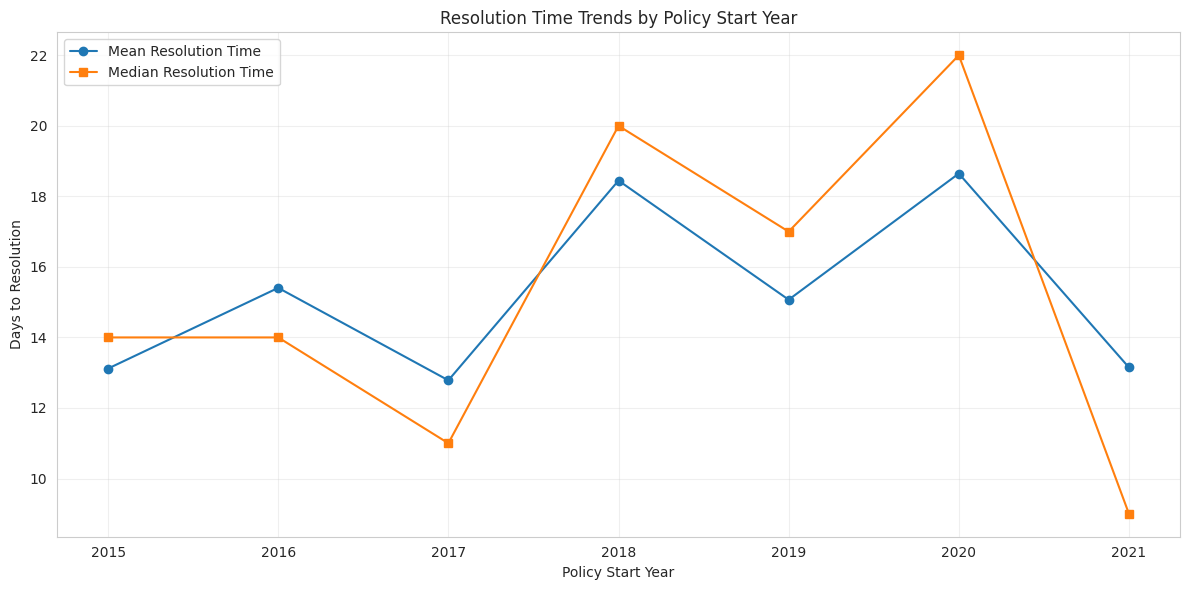

In [ ]:
# Has resolution time improved over the years?
yearly_resolution = Insurance_data1.groupby('PolicyStartYear')['TimeToResolutionDays'].agg(['mean', 'median']).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_resolution['PolicyStartYear'], yearly_resolution['mean'], marker='o', label='Mean Resolution Time')
plt.plot(yearly_resolution['PolicyStartYear'], yearly_resolution['median'], marker='s', label='Median Resolution Time')
plt.title('Resolution Time Trends by Policy Start Year')
plt.xlabel('Policy Start Year')
plt.ylabel('Days to Resolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###Multivariate Analysis

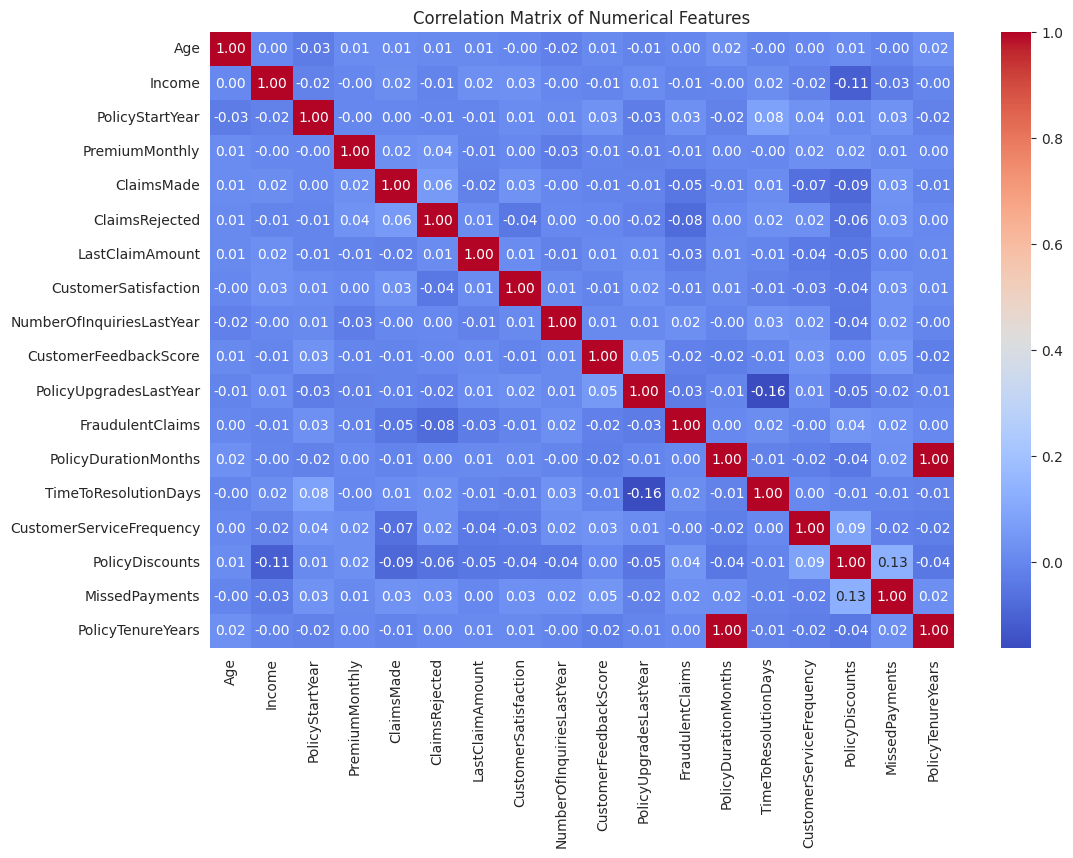

In [ ]:
# Correlation matrix using only numeric columns
correlation_matrix = Insurance_data1.select_dtypes(include=['number']).corr()

# Optional: display it
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**Feature Engineering**

In [ ]:
Insurance_data1.dropna(inplace=True)

In [ ]:
def replace_county_with_code(Insurance_data1,county_column='Region'):
    try:
        # Define county name to county code mapping
        county_mapping = {
            "Mombasa": 1, "Kwale": 2, "Kilifi": 3, "Tana River": 4, "Lamu": 5, "Taita Taveta": 6,
            "Garissa": 7, "Wajir": 8, "Mandera": 9, "Marsabit": 10, "Isiolo": 11, "Meru": 12,
            "Tharaka Nithi": 13, "Embu": 14, "Kitui": 15, "Machakos": 16, "Makueni": 17,
            "Nyandarua": 18, "Nyeri": 19, "Kirinyaga": 20, "Murang'a": 21, "Kiambu": 22,
            "Turkana": 23, "West Pokot": 24, "Samburu": 25, "Trans Nzoia": 26, "Eldoret": 27,
            "Elgeyo Marakwet": 28, "Nandi": 29, "Baringo": 30, "Laikipia": 31, "Nakuru": 32,
            "Narok": 33, "Kajiado": 34, "Kericho": 35, "Bomet": 36, "Kakamega": 37, "Vihiga": 38,
            "Bungoma": 39, "Busia": 40, "Siaya": 41, "Kisumu": 42, "Homa Bay": 43, "Migori": 44,
            "Kisii": 45, "Nyamira": 46, "Nairobi": 47
        }

        # Replace county names with county codes
        Insurance_data1['County'] = Insurance_data1[county_column].map(county_mapping)

        # Drop the original county name column
        Insurance_data1 = Insurance_data1.drop(columns=[county_column])

        print("✅ County names replaced with codes successfully!")

        return Insurance_data1

    except Exception as e:
        print(f"Error replacing county names with codes: {e}")
        return None, None


In [ ]:
Insurance_data1 = replace_county_with_code(Insurance_data1,county_column='Region')


✅ County names replaced with codes successfully!


# **MODELLING**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.pipeline import Pipeline


## Data Preparation for Modelling

## Data Scalling

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

def encode_features(Insurance_data1):

    try:

        # Identify categorical and numerical columns
        categorical_columns = Insurance_data1.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_columns = Insurance_data1.select_dtypes(include=['int64', 'float64']).columns.tolist()

        # Initialize OneHotEncoder
        encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

        # Fit on Insurance_data1 and transform both datasets
        insurance_encoded = encoder.fit_transform(Insurance_data1[categorical_columns])

        # Convert encoded features to DataFrame
        encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
        insurance_encoded_df = pd.DataFrame(insurance_encoded, columns=encoded_feature_names, index=Insurance_data1.index)

        # Drop original categorical columns from both datasets
        Insurance_data1 = Insurance_data1.drop(columns=categorical_columns)

        # Merge encoded features with the datasets
        Insurance_data1 = pd.concat([Insurance_data1, insurance_encoded_df], axis=1)

        # Apply Standard Scaling to numerical features
        scaler = StandardScaler()
        Insurance_data1[numerical_columns] = scaler.fit_transform(Insurance_data1[numerical_columns])

        print("✅ Encoding & Scaling Completed Successfully!")
        return Insurance_data1

    except Exception as e:
        print(f"Error during encoding: {e}")
        return None, None
# Encode both datasets correctly
train_data_encoded = encode_features(Insurance_data1)


✅ Encoding & Scaling Completed Successfully!


In [ ]:
train_data_encoded.columns

Index(['Age', 'Income', 'PolicyStartYear', 'PremiumMonthly', 'ClaimsMade',
       'ClaimsRejected', 'LastClaimAmount', 'CustomerSatisfaction',
       'NumberOfInquiriesLastYear', 'CustomerFeedbackScore',
       'PolicyUpgradesLastYear', 'FraudulentClaims', 'PolicyDurationMonths',
       'TimeToResolutionDays', 'CustomerServiceFrequency', 'PolicyDiscounts',
       'MissedPayments', 'PolicyTenureYears', 'County', 'Gender_M',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'PolicyType_Education', 'PolicyType_Health',
       'PolicyType_Livestock', 'PolicyType_Motor', 'PolicyType_Property',
       'RenewalStatus_Renewed', 'HouseType_Bungalow',
       'HouseType_No Housing Insurance', 'HouseType_Rental',
       'LifeInsuranceType_Term', 'LifeInsuranceType_Whole',
       'HealthInsurancePlan_No Health Insurance',
       'HealthInsurancePlan_Premium', 'DigitalPlatformUsage_Low',
       'DigitalPlatformUsage_Medium', 'CoverDetails_Comprehensive',
       

# Splitting of data

In [ ]:
# Ensure only independent features are used
columns_to_drop = [
    'TimeToResolutionDays',  # The target variable
    'ResolutionTimeCategory_15-21 days',
    'ResolutionTimeCategory_22+ days',
    'ResolutionTimeCategory_4-7 days',
    'ResolutionTimeCategory_8-14 days'
]

X = train_data_encoded.drop(columns=columns_to_drop, errors='ignore')
y = train_data_encoded['TimeToResolutionDays']

# run train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (10200, 75)
Testing data shape: (2550, 75)


In [ ]:
X_train.columns

Index(['Age', 'Income', 'PolicyStartYear', 'PremiumMonthly', 'ClaimsMade',
       'ClaimsRejected', 'LastClaimAmount', 'CustomerSatisfaction',
       'NumberOfInquiriesLastYear', 'CustomerFeedbackScore',
       'PolicyUpgradesLastYear', 'FraudulentClaims', 'PolicyDurationMonths',
       'CustomerServiceFrequency', 'PolicyDiscounts', 'MissedPayments',
       'PolicyTenureYears', 'County', 'Gender_M', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed', 'PolicyType_Education',
       'PolicyType_Health', 'PolicyType_Livestock', 'PolicyType_Motor',
       'PolicyType_Property', 'RenewalStatus_Renewed', 'HouseType_Bungalow',
       'HouseType_No Housing Insurance', 'HouseType_Rental',
       'LifeInsuranceType_Term', 'LifeInsuranceType_Whole',
       'HealthInsurancePlan_No Health Insurance',
       'HealthInsurancePlan_Premium', 'DigitalPlatformUsage_Low',
       'DigitalPlatformUsage_Medium', 'CoverDetails_Comprehensive',
       'CoverDetails_Premium', 'CoverD

In [ ]:
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace(' ', '_') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace(' ', '_') for col in X_test.columns]


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

In [ ]:
X_train

,Age,Income,PolicyStartYear,PremiumMonthly,ClaimsMade,ClaimsRejected,LastClaimAmount,CustomerSatisfaction,NumberOfInquiriesLastYear,CustomerFeedbackScore,...,ClaimAmountCategory_$2001-3000,ClaimAmountCategory_$501-1000,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56+,TenureCategory_10+_years,TenureCategory_3-5_years,TenureCategory_5-10_years,TenureCategory_1_year
11729,-0.739607,1.381259,-0.113122,-0.832341,-0.842955,1.126714,-0.703894,-0.028653,0.498835,-1.523268,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8627,-0.252589,0.019078,0.386639,-1.138044,-0.842955,-0.105645,0.642236,-0.760771,-0.433875,-1.174885,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
781,-1.296200,0.958720,-1.612406,-0.458704,0.597463,-1.338003,0.866591,1.435583,1.431546,-1.174885,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9641,1.208465,-0.560425,-1.112645,-0.458704,-0.122746,-0.105645,0.866591,-1.492889,1.431546,-0.129735,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4393,0.373577,0.978332,0.886400,0.186669,0.597463,1.126714,-1.601315,-0.028653,1.431546,0.915415,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12203,-0.948330,0.494319,-0.612884,-1.375813,0.597463,-0.105645,0.642236,1.435583,-0.433875,-0.826502,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5299,0.860595,-0.888187,-0.612884,-0.051100,1.317671,-1.338003,0.193526,-1.492889,0.498835,1.612181,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5503,0.234429,-1.262090,1.386161,0.526339,0.597463,-1.338003,-0.591717,0.703465,-0.433875,-0.826502,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
876,0.930169,1.341537,-0.113122,1.681218,-0.842955,-1.338003,-1.376959,1.435583,1.431546,-0.478118,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
X_train.shape

(10200, 75)

#Model selection and Training

In [ ]:
# Define optimized models
models = {
    "Ridge Regression": Ridge(alpha=0.8),
    "Lasso Regression": Lasso(alpha=0.05),
    "ElasticNet": ElasticNet(alpha=0.05, l1_ratio=0.6),
    "Random Forest": RandomForestRegressor(n_estimators=600, max_depth=12, min_samples_split=8, min_samples_leaf=4, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=1000, learning_rate=0.008, max_depth=5, subsample=0.85, random_state=42),
    "SVR": SVR(kernel='rbf', C=5, gamma='scale'),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.008, max_depth=6, subsample=0.85, colsample_bytree=0.9, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Store results
    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display performance comparison
print("\nOptimized Model Performance Comparison:")
print(results_df)

Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet...
Training Random Forest...
Training Gradient Boosting...
Training SVR...
Training XGBoost...

Optimized Model Performance Comparison:
               Model  Train RMSE  Test RMSE  Train R²   Test R²  Train MAE  \
0   Ridge Regression    0.961427   0.947978  0.079216  0.086845   0.839768   
1   Lasso Regression    0.989605   0.976020  0.024451  0.032021   0.879008   
2         ElasticNet    0.987700   0.973189  0.028204  0.037630   0.876040   
3      Random Forest    0.568907   0.742027  0.677591  0.440516   0.447063   
4  Gradient Boosting    0.665489   0.725898  0.558829  0.464574   0.534860   
5                SVR    0.306185   0.948631  0.906612  0.085587   0.188349   
6            XGBoost    0.590332   0.711899  0.652850  0.485027   0.466827   

   Test MAE  
0  0.828177  
1  0.867472  
2  0.863113  
3  0.584489  
4  0.582049  
5  0.774248  
6  0.563779  


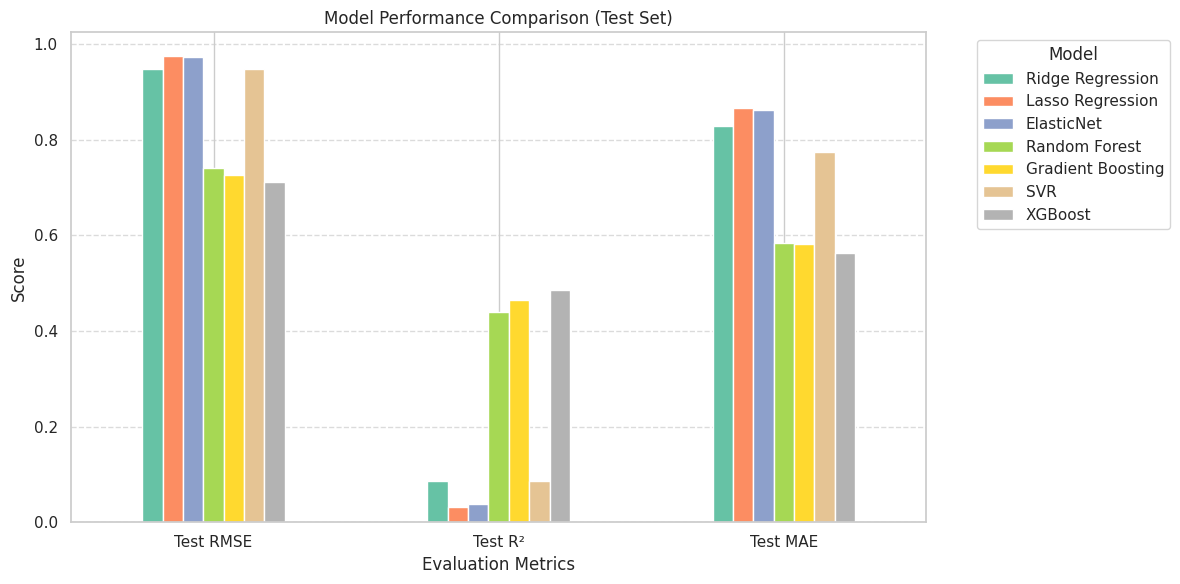

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose metrics to compare
metrics_to_plot = ['Test RMSE', 'Test R²', 'Test MAE']

# Prepare the DataFrame for plotting
plot_df = results_df.set_index('Model')[metrics_to_plot].T

# Set the plot style
sns.set(style="whitegrid")
plot_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')

# Customize the plot
plt.title("Model Performance Comparison (Test Set)")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



# Model Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions for Randomized Search
rf_param_dist = {
    'n_estimators': [400, 500, 600, 700],
    'max_depth': [8, 10, 12, 14],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=20,  # Try 20 random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_rf = rf_random_search.best_estimator_
print("Best Random Forest Parameters:", rf_random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 14}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions
gb_param_dist = {
    'n_estimators': [600, 800, 1000, 1200],
    'learning_rate': [0.005, 0.008, 0.01, 0.015],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.85, 1.0]
}

# RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
gb_random_search.fit(X_train, y_train)

# Retrieve the best estimator and parameters
best_gb = gb_random_search.best_estimator_
print("Best Gradient Boosting Parameters:", gb_random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Parameters: {'subsample': 1.0, 'n_estimators': 1200, 'max_depth': 6, 'learning_rate': 0.01}


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define hyperparameter distributions
xgb_param_dist = {
    'n_estimators': [750, 800, 900, 1000, 1100],
    'learning_rate': [0.005, 0.008, 0.01, 0.012],
    'max_depth': [4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Set up randomized search
xgb_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=20,  # Try 20 random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Retrieve the best estimator and parameters
best_xgb = xgb_random_search.best_estimator_
print("Best XGBoost Parameters:", xgb_random_search.best_params_)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Parameters: {'subsample': 0.9, 'n_estimators': 900, 'max_depth': 7, 'learning_rate': 0.012, 'colsample_bytree': 0.8}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Store the best models from RandomizedSearchCV
tuned_models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb
}

# Evaluate each model
results = []

for name, model in tuned_models.items():
    model.fit(X_train, y_train)  # using full feature set

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results.append({
        "Model": name,
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Train R²": r2_score(y_train, y_pred_train),
        "Test R²": r2_score(y_test, y_pred_test)
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
print("\nTuned Model Performance Comparison:")
print(results_df)



Tuned Model Performance Comparison:
               Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  \
0      Random Forest    0.435035   0.736461   0.338630  0.576397  0.811473   
1  Gradient Boosting    0.532013   0.715985   0.417052  0.561437  0.718052   
2            XGBoost    0.436335   0.702559   0.336253  0.549625  0.810344   

    Test R²  
0  0.448878  
1  0.479098  
2  0.498450  


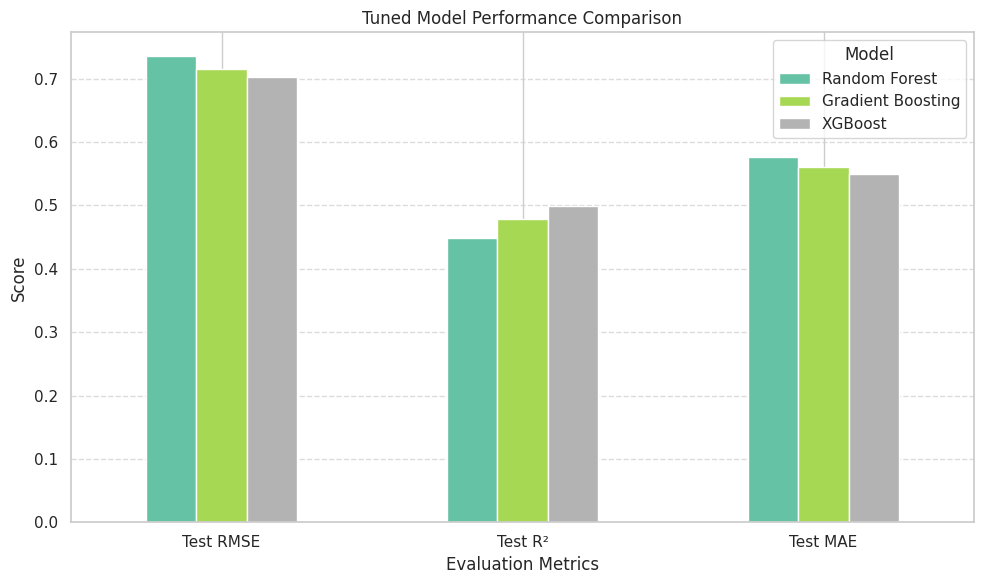

In [ ]:
import matplotlib.pyplot as plt

metrics_to_plot = ['Test RMSE', 'Test R²', 'Test MAE']
plot_df = results_df.set_index('Model')[metrics_to_plot].T

plot_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Tuned Model Performance Comparison")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Model explanability

In [ ]:
!pip install shap
import shap
shap.initjs()

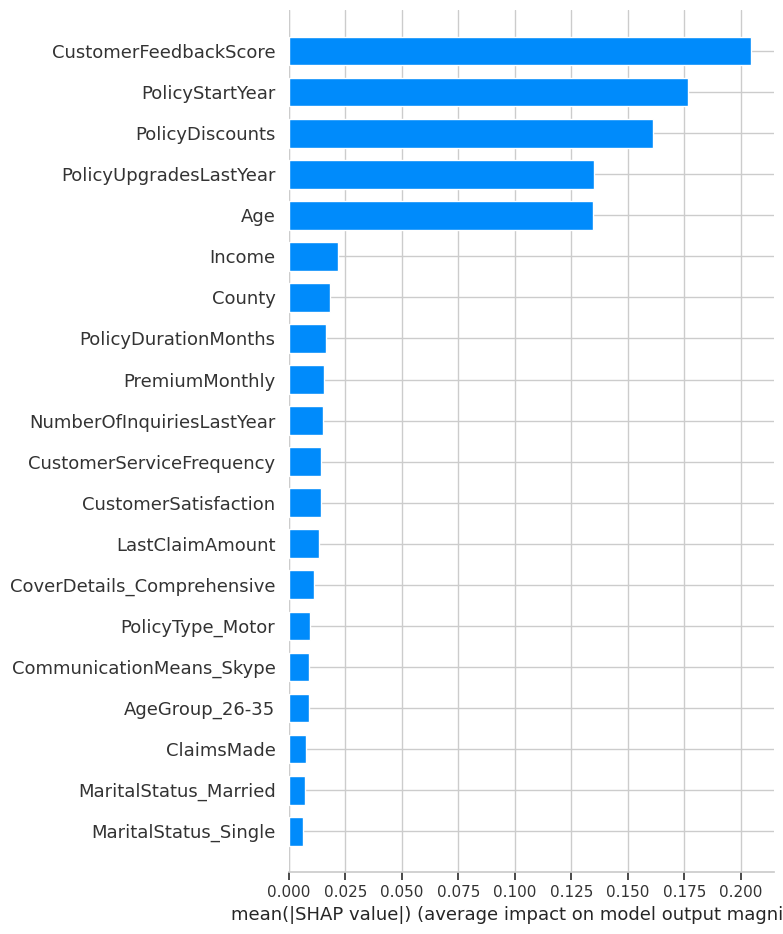

In [ ]:
import shap

# Create a SHAP explainer specifically for XGBoost
explainer = shap.Explainer(best_xgb)  # You can also use shap.TreeExplainer(best_xgb)

# Get SHAP values for the test data
shap_values = explainer(X_test)

# Plot a summary of feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()




In [ ]:
import shap

# Use the proper explainer for tree-based models (like XGBoost, RF)
explainer = shap.Explainer(best_xgb, X_train)

# Compute SHAP values – now returns an Explanation object
shap_values = explainer(X_test)

# Force plot for a single prediction
sample_idx = 0
shap.initjs()
shap.force_plot(shap_values[sample_idx])


100%|===================| 2541/2550 [05:16<00:01]       

In [ ]:
# Keep only top features from SHAP plot
important_features = [
    "CustomerFeedbackScore",
    "PolicyStartYear",
    "PolicyDiscounts",
    "PolicyUpgradesLastYear",
    "Age",
    "County",
    "Income",
    "PolicyDurationMonths",
    "NumberOfInquiriesLastYear",
    "CustomerSatisfaction"

]

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]


In [ ]:


# Define optimized models
models = {
    "Ridge Regression": Ridge(alpha=0.8),
    "Lasso Regression": Lasso(alpha=0.05),
    "ElasticNet": ElasticNet(alpha=0.05, l1_ratio=0.6),
    "Random Forest": RandomForestRegressor(n_estimators=600, max_depth=12, min_samples_split=8, min_samples_leaf=4, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=1000, learning_rate=0.008, max_depth=5, subsample=0.85, random_state=42),
    "SVR": SVR(kernel='rbf', C=5, gamma='scale'),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.008, max_depth=6, subsample=0.85, colsample_bytree=0.9, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_selected, y_train)

    # Predictions
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Store results
    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display performance comparison
print("\nOptimized Model Performance Comparison:")
print(results_df)

Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet...
Training Random Forest...
Training Gradient Boosting...
Training SVR...
Training XGBoost...

Optimized Model Performance Comparison:
               Model  Train RMSE  Test RMSE  Train R²   Test R²  Train MAE  \
0   Ridge Regression    0.985208   0.969541  0.033101  0.044830   0.871954   
1   Lasso Regression    0.989605   0.976020  0.024451  0.032021   0.879008   
2         ElasticNet    0.987700   0.973189  0.028204  0.037630   0.876040   
3      Random Forest    0.592010   0.731331  0.650874  0.456529   0.457463   
4  Gradient Boosting    0.674281   0.718158  0.547095  0.475932   0.538316   
5                SVR    0.803102   0.924335  0.357510  0.131825   0.600367   
6            XGBoost    0.611896   0.702944  0.627024  0.497901   0.479651   

   Test MAE  
0  0.856776  
1  0.867472  
2  0.863113  
3  0.565530  
4  0.571669  
5  0.735059  
6  0.550530  


# Tuning of the model

In [ ]:
X_train_selected["PolicyDiscounts_Feedback"] = X_train_selected["PolicyDiscounts"] * X_train_selected["CustomerFeedbackScore"]
X_test_selected["PolicyDiscounts_Feedback"] = X_test_selected["PolicyDiscounts"] * X_test_selected["CustomerFeedbackScore"]



In [ ]:
best_xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=6,
    subsample=0.85,
    colsample_bytree=0.9,
    reg_alpha=0.7,
    reg_lambda=1.2,
    gamma=0.1,
    random_state=42
)

In [ ]:
best_rf = RandomForestRegressor(
    n_estimators=800,  # More trees for stability
    max_depth=12,  # Controls overfitting
    min_samples_split=10,  # Requires more samples per split
    min_samples_leaf=5,  # Prevents small splits
    random_state=42
)


In [ ]:
best_gb = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)


In [ ]:
# Define optimized models
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb
}

# Train & evaluate
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_selected, y_train)

    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    results.append({
        'Model': name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train MAE': train_mae,
        'Test MAE': test_mae
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display performance comparison
print("\nFinal Optimized Model Performance:")
print(results_df)


Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

Final Optimized Model Performance:
               Model  Train RMSE  Test RMSE  Train R²   Test R²  Train MAE  \
0      Random Forest    0.604318   0.730658  0.636206  0.457528   0.467113   
1  Gradient Boosting    0.706470   0.724934  0.502821  0.465995   0.568677   
2            XGBoost    0.590856   0.688825  0.652233  0.517868   0.459071   

   Test MAE  
0  0.564316  
1  0.581849  
2  0.534147  


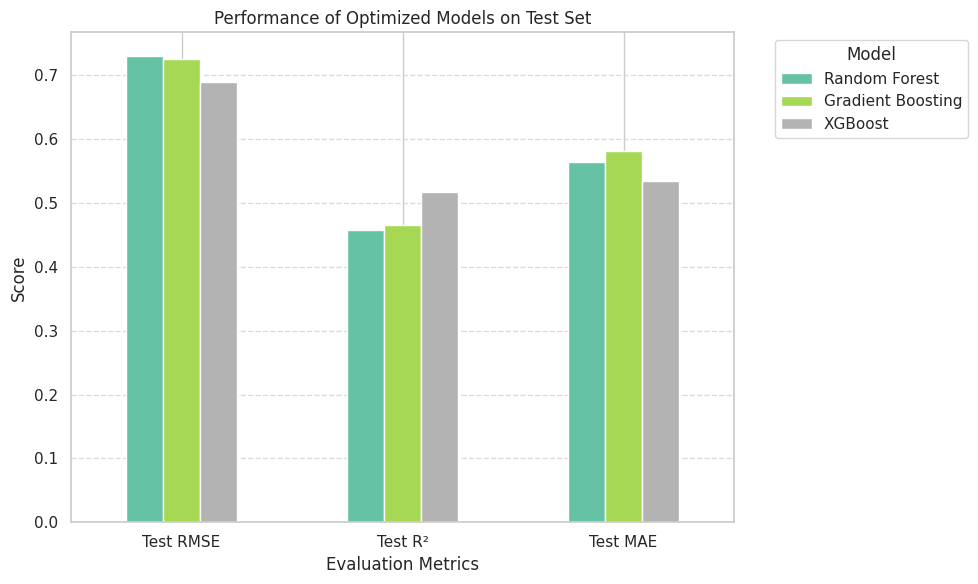

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose metrics to visualize
metrics_to_plot = ['Test RMSE', 'Test R²', 'Test MAE']

# Set index and transpose for plotting
plot_df = results_df.set_index('Model')[metrics_to_plot].T

# Set style
sns.set(style="whitegrid")

# Plot
plot_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')

# Customize appearance
plt.title("Performance of Optimized Models on Test Set")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
